# Multiple Regression for Housing Price Prediction

## Objective
To use multiple regression to predict housing prices based on various housing features.



## Key Concepts

- **Exploratory Data Analysis (EDA):** Analyzing the dataset to gain insights, check for missing values, and visualize distributions and correlations.

- **Feature Selection:** Identifying which features are most relevant to the prediction.

- **Feature Scaling:** Normalizing or standardizing the features to improve model performance.

- **Handling Categorical Variables:** Encoding categorical variables before using them in the regression model.

- **Multiple Regression Model:** A model that uses multiple independent variables to predict an outcome.

- **Model Evaluation:** Using metrics like R-squared, Mean Squared Error, and residual analysis to assess the performance of the model.

- **Cross-Validation:** Evaluating the model's performance across different subsets of the data.

- **Hyperparameter Tuning:** Optimizing the model's hyperparameters to improve performance.

- **Model Interpretation:** Understanding the impact of each feature on the predicted price.

- **Model Deployment:** Saving the trained model and using it to make predictions on new data.



## Practical Example: Housing Price Prediction

Given a dataset with housing features, we aim to predict the price of houses.


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
# Load the housing dataset
housing_data = pd.read_csv('./datasets/housing.csv')

In [27]:
housing_data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [28]:
housing_data.shape

(5000, 7)

In [29]:
housing_data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [30]:
housing_data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

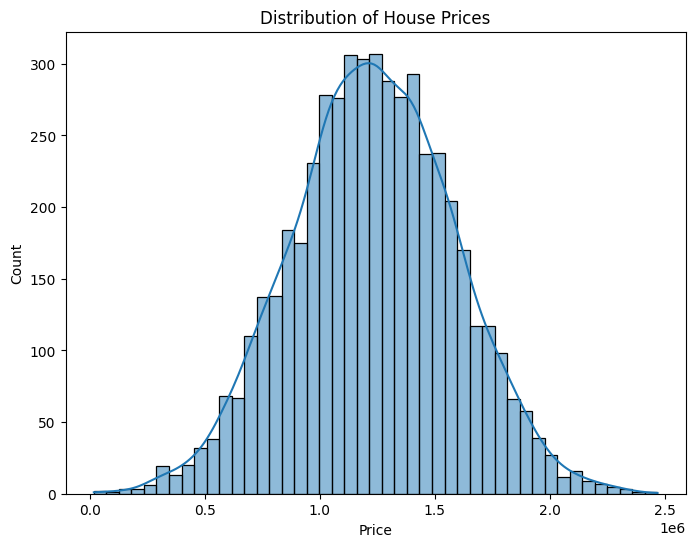

In [31]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(housing_data['Price'], kde=True)
plt.xlabel('Price')
plt.title('Distribution of House Prices')
plt.show()

In [32]:
# Drop address column
housing_data.drop('Address', axis=1, inplace=True)

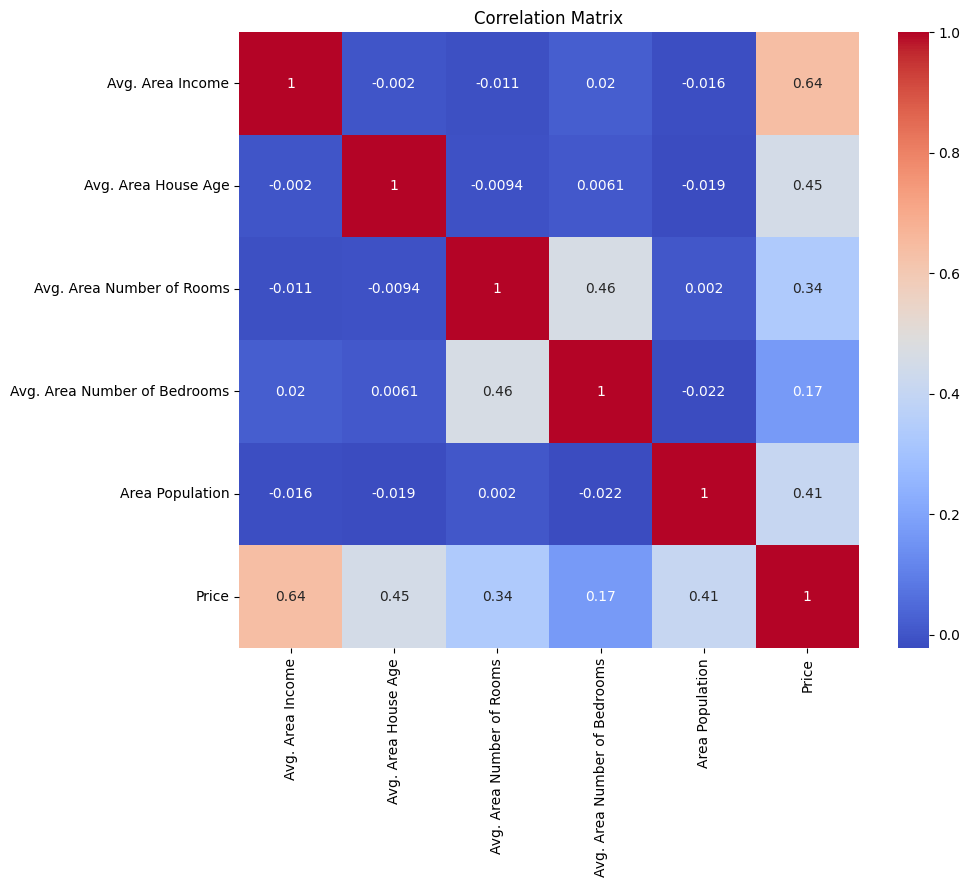

In [33]:
# Visualize the correlation matrix
corr_matrix = housing_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [34]:
# Feature matrix and target vector
X = housing_data.drop('Price', axis=1)  # We assume 'Price' is the column we want to predict
y = housing_data['Price']

In [35]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
# Create a pipeline with scaling and model
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

In [37]:
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [38]:
# Make predictions on the test set
y_pred = pipeline.predict(X_test)

In [39]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 10089009299.501554
R-squared: 0.9179971706985147


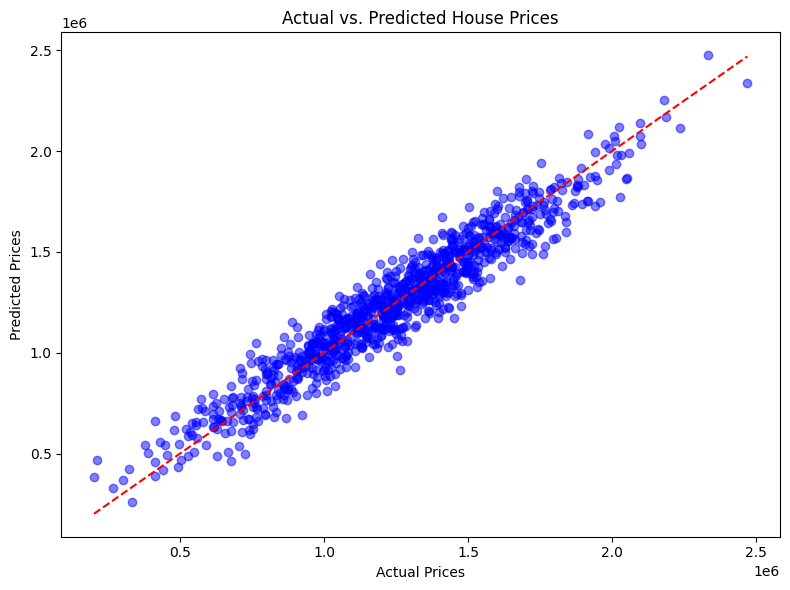

In [40]:
# Plot the actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices')
plt.tight_layout()
plt.show()

In [41]:
# Hyperparameter tuning
param_grid = {
    'regressor': [LinearRegression(), Ridge(), Lasso(), ElasticNet()],
}

In [42]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'regressor': Ridge()}
Best score: 0.9174131951395308


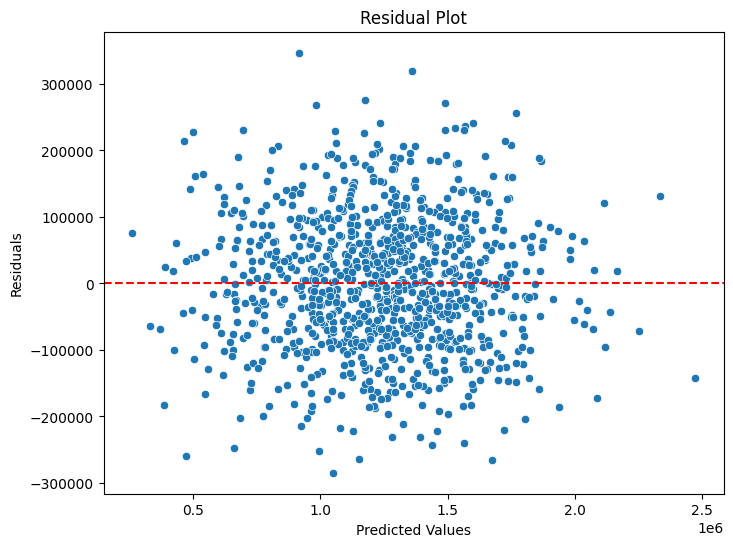

In [43]:
# Residual analysis
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [44]:
# Model interpretation
best_model = grid_search.best_estimator_
coef_df = pd.DataFrame(
    data=best_model['regressor'].coef_,
    index=X.columns,
    columns=['Coefficient']
)
print("Model Coefficients:")
print(coef_df)

Model Coefficients:
                                Coefficient
Avg. Area Income              231682.183743
Avg. Area House Age           163538.420979
Avg. Area Number of Rooms     120684.509393
Avg. Area Number of Bedrooms    3011.267385
Area Population               152196.012371


The coefficients represent the change in the target variable (Price) for a one-unit increase in the corresponding feature, assuming all other features remain constant. Here's the interpretation of each coefficient:

1. **Avg. Area Income**: A coefficient of 231682.183743 indicates that for every one-unit increase in the average area income, the house price is expected to increase by approximately $231,682, assuming all other features remain constant.

2. **Avg. Area House Age**: A coefficient of 163538.420979 suggests that for every one-unit increase in the average age of houses in the area, the house price is expected to increase by around $163,538, keeping other features constant.

3. **Avg. Area Number of Rooms**: A coefficient of 120684.509393 implies that for each additional room in the average area, the house price is expected to increase by about $120,685, assuming other features remain unchanged.

4. **Avg. Area Number of Bedrooms**: A coefficient of 3011.267385 indicates that for every additional bedroom in the average area, the house price is expected to increase by approximately $3,011, keeping other features constant.

5. **Area Population**: A coefficient of 152196.012371 suggests that for every one-unit increase in the area population, the house price is expected to increase by around $152,196, assuming other features remain constant.

It's important to note that these interpretations assume a linear relationship between the features and the target variable, and that the coefficients represent the effect of each feature while holding other features constant.

Also, keep in mind that the scale of the features can impact the magnitude of the coefficients. If the features have different scales, it's recommended to standardize or normalize them before fitting the model to ensure fair comparison and interpretation of the coefficients.

Additionally, it's crucial to consider the context and domain knowledge when interpreting the coefficients. Some coefficients may seem counterintuitive or may not align with real-world expectations. In such cases, it's important to critically evaluate the results and consider other factors that may influence the relationship between the features and the target variable.

Overall, the coefficients provide insights into the impact of each feature on the house price, but they should be interpreted cautiously and in conjunction with domain expertise and further analysis.

In [45]:
# Save model 
import joblib

joblib.dump(best_model, 'house_price_prediction_model.pkl')

['house_price_prediction_model.pkl']

In [46]:
# load model
loaded_model = joblib.load('house_price_prediction_model.pkl')

In [47]:
# Create a DataFrame with example data
example_data = pd.DataFrame({
    'Avg. Area Income': [50000, 60000, 70000, 80000, 90000],
    'Avg. Area House Age': [5, 10, 15, 20, 25],
    'Avg. Area Number of Rooms': [5, 6, 7, 8, 9],
    'Avg. Area Number of Bedrooms': [2, 3, 4, 5, 6],
    'Area Population': [30000, 40000, 50000, 60000, 70000]
})

# Make predictions using the loaded model
example_predictions = loaded_model.predict(example_data)

# Print the example data and predictions
print("Example Data:")
print(example_data)
print("\nPredicted Prices:")
for i, price in enumerate(example_predictions):
    print(f"Example {i+1}: ${price:.2f}")

Example Data:
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0             50000                    5                          5   
1             60000                   10                          6   
2             70000                   15                          7   
3             80000                   20                          8   
4             90000                   25                          9   

   Avg. Area Number of Bedrooms  Area Population  
0                             2            30000  
1                             3            40000  
2                             4            50000  
3                             5            60000  
4                             6            70000  

Predicted Prices:
Example 1: $332198.16
Example 2: $1646486.63
Example 3: $2960775.10
Example 4: $4275063.57
Example 5: $5589352.04
